# Image Preprocessing - JMUBEN Dataset

In [1]:
import os, cv2, random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from mpl_toolkits.axes_grid1 import ImageGrid

In [2]:
DATASETS_FOLDER = "./datasets"
PATH_JMUBEN = DATASETS_FOLDER + "/jmuben"
PATH_JMUBEN_ORIGINAL = PATH_JMUBEN + "/original"
PATH_JMUBEN_RESIZED = PATH_JMUBEN + "/resized"
PATH_JMUBEN_GRAYSCALE = PATH_JMUBEN + "/grayscale"

## 1. Resizing dataset images for 128x128

### 1.1. Listing directories

In [3]:
directories = os.listdir(PATH_JMUBEN_ORIGINAL)

### 1.2. Resizing images

In [4]:
for directory in directories:
    root = f"{PATH_JMUBEN_ORIGINAL}/{directory}"
    files = next(os.walk(root))[2]
    
    for file in tqdm(files, "Resizing images"):
        image = cv2.imread(f"{root}/{file}")
        image_resized = cv2.resize(image, dsize=(128, 128), interpolation=cv2.INTER_CUBIC)
        
        images_resized_path = f"{PATH_JMUBEN_RESIZED}/{directory}"
        
        if not os.path.exists(images_resized_path):
            os.makedirs(images_resized_path)
            
        cv2.imwrite(f"{images_resized_path}/{file}", image_resized)
        
    print(f"Images from {directory} folder resized!")

Resizing images: 100%|██████████████████████████████████████████████████████████| 16978/16978 [00:12<00:00, 1318.24it/s]


Images from Miner folder resized!


Resizing images: 100%|████████████████████████████████████████████████████████████| 6571/6571 [00:05<00:00, 1302.25it/s]


Images from Phoma folder resized!


Resizing images: 100%|██████████████████████████████████████████████████████████| 18983/18983 [00:13<00:00, 1425.63it/s]


Images from Healthy folder resized!


Resizing images: 100%|████████████████████████████████████████████████████████████| 8336/8336 [00:04<00:00, 1738.83it/s]


Images from Leaf rust folder resized!


Resizing images: 100%|████████████████████████████████████████████████████████████| 7681/7681 [00:05<00:00, 1289.50it/s]

Images from Cerscospora folder resized!


## 2. Verifying if all images was resized

In [5]:
dimentions = {}

In [6]:
for root, _, files in os.walk(PATH_JMUBEN_RESIZED):
    for file in files:
        try:
            image = Image.open(f"{root}/{file}")
            size = f"{image.size[0]} x {image.size[1]}"

            if size not in dimentions:
                dimentions[size] = 1
            else:
                dimentions[size] += 1
        except Exception as e:
            print(e)

In [7]:
for size in sorted(dimentions, key=dimentions.get, reverse=True):
    print(f"{size} = {dimentions[size]} images")

128 x 128 = 58549 images


## 3. Plotting 5x5 grid about samples diseases

### 3.1. Choosing 5 images from each disease

In [8]:
classes = ["Healthy", "Cerscospora", "Leaf rust", "Miner", "Phoma"]
selected_images = []

for label in classes:
    root = f"{PATH_JMUBEN_RESIZED}/{label}"
    files = next(os.walk(root))[2]
    
    random_images = random.sample(files, 5)
    
    for image in random_images:
        selected_images.append(f"{root}/{image}")

### 3.2. Plotting grid

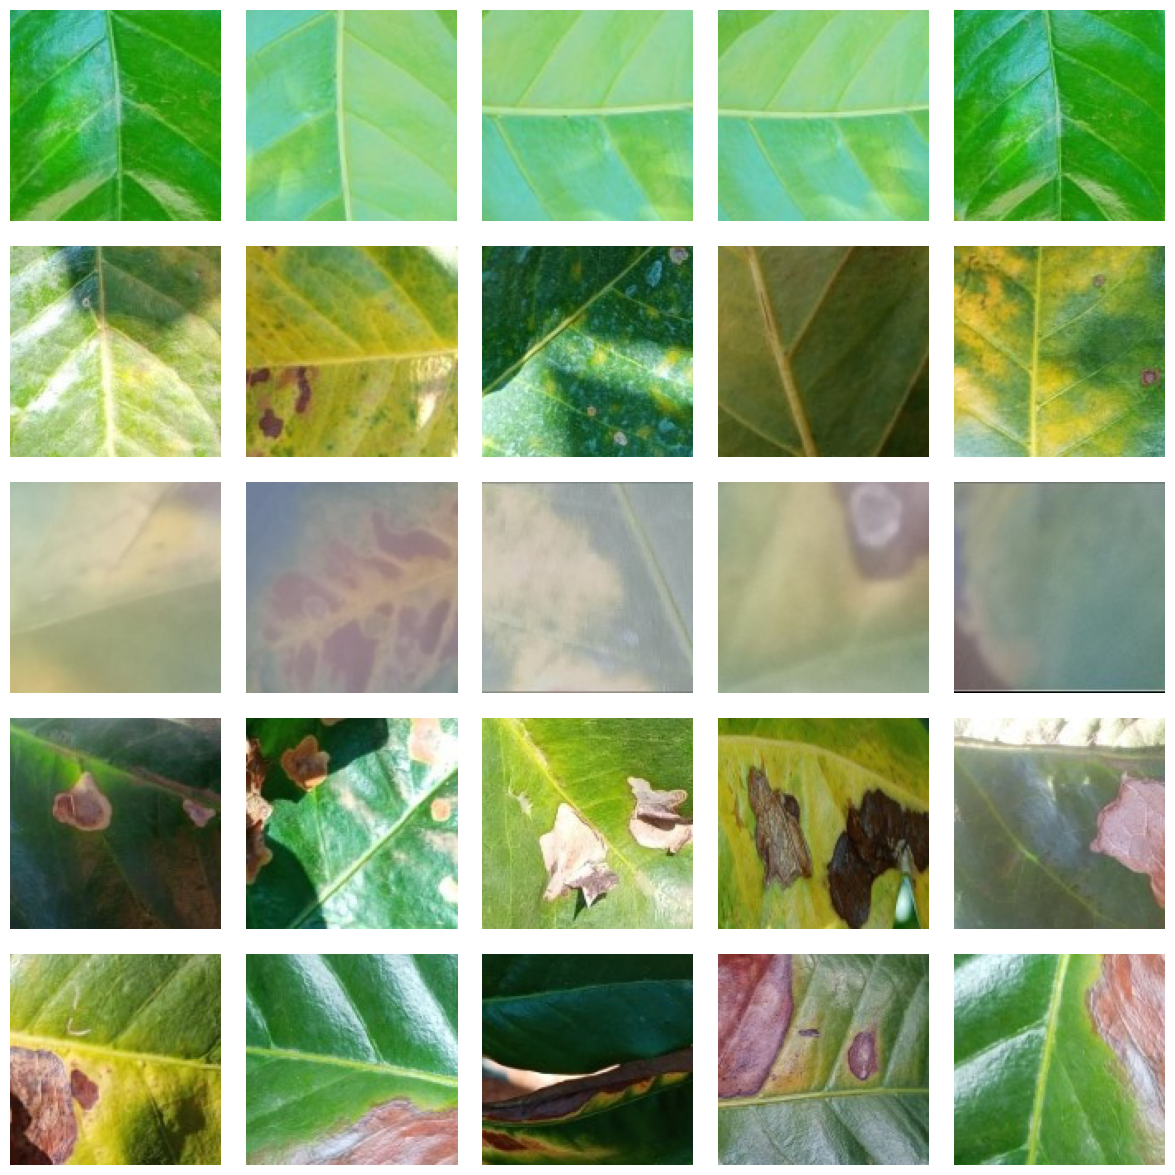

In [9]:
fig = plt.figure(figsize=(15., 15.))
grid = ImageGrid(fig, 111, nrows_ncols=(5, 5), axes_pad=0.25)

for ax, image in zip(grid, selected_images):
    image = plt.imread(image)
    ax.imshow(image)
    ax.axis('off')

fig = plt.gcf()
fig.savefig("./graphics/grid_5x5.jpg", dpi=90)
plt.show()

## 4. Converting images to grayscale

In [10]:
for directory in directories:
    root = f"{PATH_JMUBEN_RESIZED}/{directory}"
    files = next(os.walk(root))[2]
    
    images_grayscale_path = f"{PATH_JMUBEN_GRAYSCALE}/{directory}"
    
    if not os.path.exists(images_grayscale_path):
        os.makedirs(images_grayscale_path)
    
    for file in tqdm(files, "Converting images"):
        src = f"{root}/{file}"
        dst = f"{images_grayscale_path}/{file}"
        
        image = Image.open(src)
        image_gray = image.convert('L')
        image_gray.save(dst)
        
    print(f"Images from {directory} folder converted!")

Converting images: 100%|████████████████████████████████████████████████████████| 16978/16978 [00:12<00:00, 1333.88it/s]


Images from Miner folder converted!


Converting images: 100%|██████████████████████████████████████████████████████████| 6571/6571 [00:05<00:00, 1291.31it/s]


Images from Phoma folder converted!


Converting images: 100%|████████████████████████████████████████████████████████| 18983/18983 [00:13<00:00, 1453.76it/s]


Images from Healthy folder converted!


Converting images: 100%|██████████████████████████████████████████████████████████| 8336/8336 [00:05<00:00, 1625.06it/s]


Images from Leaf rust folder converted!


Converting images: 100%|██████████████████████████████████████████████████████████| 7681/7681 [00:05<00:00, 1353.53it/s]

Images from Cerscospora folder converted!


## 5. Verifying if all images was converted

In [11]:
dimentions = {}

In [12]:
for root, _, files in os.walk(PATH_JMUBEN_GRAYSCALE):
    for file in files:
        try:
            image = Image.open(f"{root}/{file}")
            size = f"{image.size[0]} x {image.size[1]}"

            if size not in dimentions:
                dimentions[size] = 1
            else:
                dimentions[size] += 1
        except Exception as e:
            print(e)

In [13]:
for size in sorted(dimentions, key=dimentions.get, reverse=True):
    print(f"{size} = {dimentions[size]} images")

128 x 128 = 58549 images
